Link GSheet: https://docs.google.com/spreadsheets/d/1kd0Cp-aH18CEiuzydak3Q7UKzEp1_935fbygBj-6Jws/edit#gid=0  
Link Kaggle: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [1]:
# Library

# Basic Statistic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Statistics
from scipy.stats import normaltest

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve,average_precision_score,plot_precision_recall_curve

# Feature Selection
from sklearn.feature_selection import RFE

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Problem Statement

**1. Background Problem :**

Company want to increase recruitment efficiency based on training

**2. Problem Statement for Machine Learning :**

Company wants to know which candidates are really wants to work for the company based on company training to be hired as data scientists

**3. Action :**

Focusing the recruitment for people who are selected by model ML and suitable with criteria based on analysis

**4. Value / Goals :**

Reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

0 : Not looking for job change  
1 : Looking for a job change

**Metric Evaluation**

Type 1 error : False Positive  
Model predicts that candidate is looking for a job change while actually not  
Consequences: loss of recruitment cost, time and resource

Type 2 error : False Negative  
Model predicts that candidate is not looking for a job change while actually he/she is  
Consequences: loss of potential candidate  

# Data Understanding

In [2]:
#Load Dataset
df = pd.read_csv("aug_train.csv")
df

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
3                  52     1.0  
4                   8     0.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[19158 rows x 14 columns]

***
* enrollee_id : Unique ID for candidate [numeric]
* city: City code (unknown) [categorical]
* city_ development _index (CDI): Developement index of the city (scaled). Ranks cities according to their Infrastructure, Waste Management, Health, Education, and City Product [numeric]
* gender: Gender of candidate [categorical]
* relevent_experience: Relevant experience of candidate [categorical ordinal]
* enrolled_university: Type of University course enrolled if any [categorical]
* education_level: Education level of candidate [categorical ordinal]
* major_discipline :Education major discipline of candidate [categorical]
* experience: Candidate total experience in years [categorical ordinal]
* company_size: No of employees in current employer's company [categorical ordinal]
* company_type : Type of current employer [categorical]
* lastnewjob: Difference in years between previous job and current job [categorical ordinal]
* training_hours: training hours completed [numeric]
* target: Candidates who decide looking for a job change or not [categorical]

In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# Describing Numerical Data
df.describe().drop(columns=['enrollee_id','target'])

city_development_index  training_hours
count            19158.000000    19158.000000
mean                 0.828848       65.366896
std                  0.123362       60.058462
min                  0.448000        1.000000
25%                  0.740000       23.000000
50%                  0.903000       47.000000
75%                  0.920000       88.000000
max                  0.949000      336.000000

In [5]:
# Describing non Numerical Data
df.describe(include=object)

city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040

# Exploratory Data Analysis (EDA)

## Data Distribution

Text(0.5, 1.0, 'Training Hours Histogram')

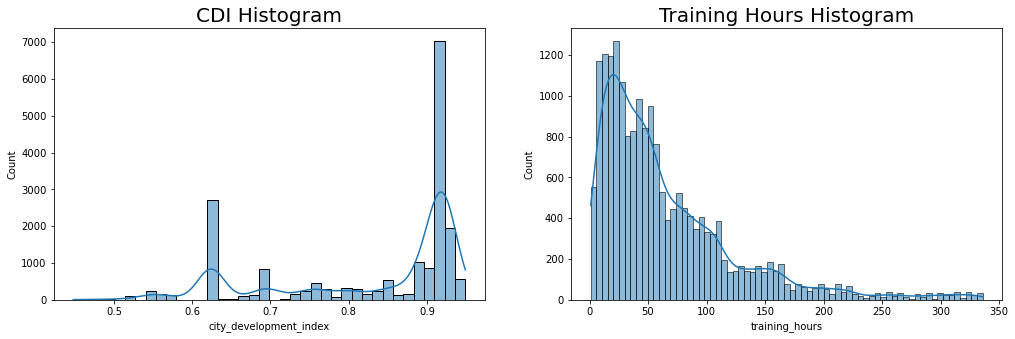

In [6]:
# Distribution of numerical data
plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
sns.histplot(df["city_development_index"],kde=True)
plt.title("CDI Histogram",fontsize=20)

plt.subplot(122)
sns.histplot(df["training_hours"],kde=True)
plt.title("Training Hours Histogram",fontsize=20)

In [7]:
# Distribution normality test
numerical_feature = ['city_development_index','training_hours']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

city_development_index : Not normal distribution
training_hours : Not normal distribution


**Distribution data of CDI and Training hours is not normal**

## Identify Missing Values

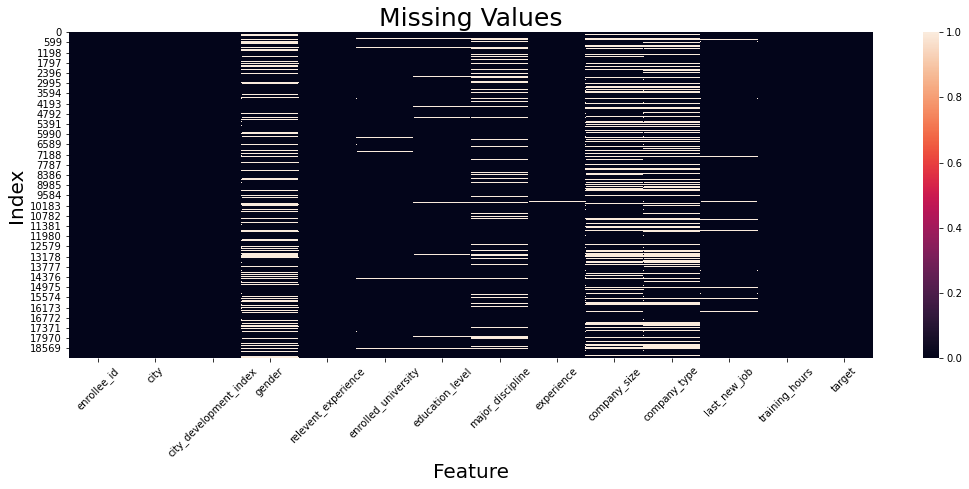

In [8]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isna())
plt.xlabel("Feature",fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Index",fontsize=20)
plt.title("Missing Values",fontsize=25)
plt.show()

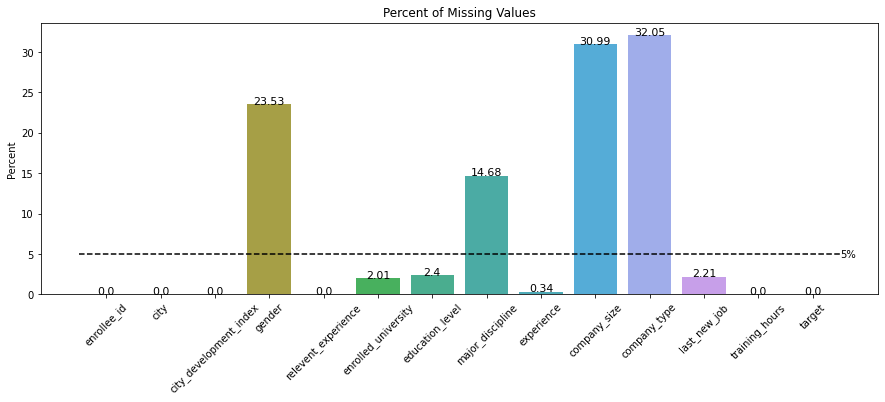

In [9]:
# Missing value percentage per column
PMV = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
PMV = PMV.rename(columns={0:"Percent"})

plt.figure(figsize=(15,5))
plt.title("Percent of Missing Values")
ax = sns.barplot(data=PMV,x=PMV.index,y="Percent")
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
ax.plot(bound,[5,5],'--',c='k')
ax.text(bound[1],5,'5%', va='center', fontdict={'size':10})
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

* Missing value < 5% : Fill with mode
* Missing Value >= 5% : Fill with new constant

## Identify Data Imbalance

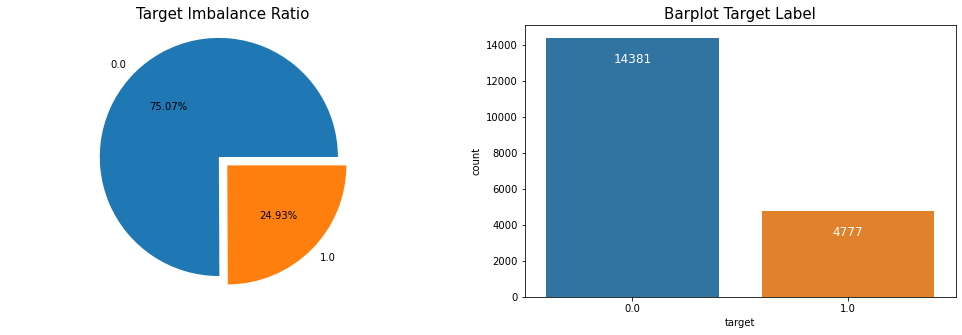

In [10]:
plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts()/len(df)*100,2),labels=list(df['target'].value_counts().index),autopct = "%.2f%%",explode = (0,0.1))
plt.axis("equal")
plt.title("Target Imbalance Ratio",size=15)

plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

**Target data is imbalance**

## Preprocessing

In [11]:
# # gender
# df['gender'] = df['gender'].fillna('Not provided')
# df['gender'].value_counts()

In [12]:
# # enrolled_university
# df['enrolled_university'] = df['enrolled_university'].fillna(str(df['enrolled_university'].mode()[0]))
# df['enrolled_university'].value_counts()

In [13]:
# # education_level
# df['education_level'] = df['education_level'].fillna(str(df['education_level'].mode()[0]))
# df['education_level'].value_counts()

In [14]:
# # major_discipline
# df['major_discipline'] = df['major_discipline'].fillna('Not provided')
# df['major_discipline'].value_counts()

In [15]:
# # experience
# df['experience'] = df['experience'].fillna(str(df['experience'].mode()[0]))
# df['experience'].value_counts()

In [16]:
# # company_size 
# df['company_size'] = df['company_size'].fillna('Not provided')
# df['company_size'].value_counts()

In [17]:
# # company_type
# df['company_type'] = df['company_type'].fillna('Not provided')
# df['company_type'].value_counts()

In [18]:
# # last_new_job 
# df['last_new_job'] = df['last_new_job'].fillna(str(df['last_new_job'].mode()[0]))
# df['last_new_job'].value_counts()

In [19]:
# Check data values
for i in list(df.select_dtypes(['object']).columns):
    print(i,'\n',df[i].value_counts(),'\n')

city 
 city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64 

gender 
 Male      13221
Female     1238
Other       191
Name: gender, dtype: int64 

relevent_experience 
 Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64 

enrolled_university 
 no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64 

education_level 
 Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64 

major_discipline 
 STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64 

experience 
 >20    3286

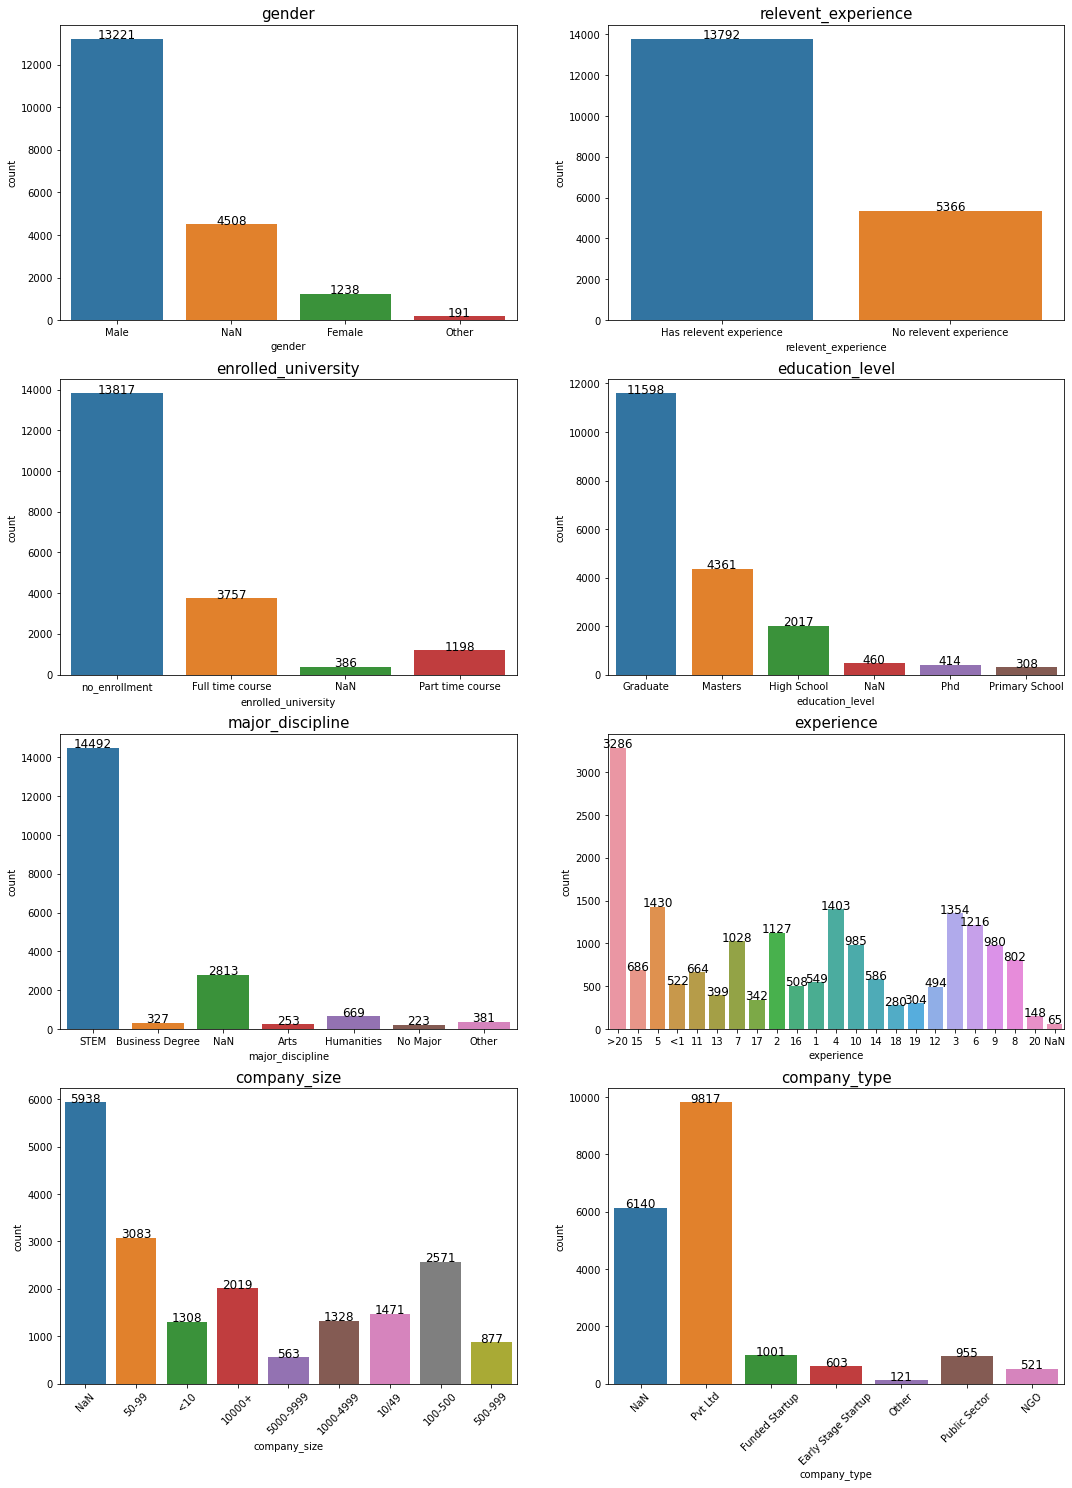

In [20]:
# Visualize data values
plt.figure(figsize=(18,25))
column_list = list(df.columns.values) [3:11]
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=7:
        plt.xticks(rotation=45)

From the demography bar plot, we can see that:
* Gender profile is dominated by male candidate
* There are more candidate that has relevant work experience than those who are unexperienced
* Most of the candidate are not enrolling university
* Most of the candidate are graduates
* There is a significant number of STEM graduate than any other discipline 
* There is more candidates that has experience above 20 years prior
* There is more candidates that did not provide their previous company size
* More than half of the candidate worked at Pvt Ltd company type

## Data Inconsistency

In [21]:
# Make data more neat to read
df['enrolled_university'] = df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [22]:
# Correctiong punctuation
df['company_size'] = df['company_size'].replace('10/49','10-49')

In [23]:
# Check any duplicate data
df['enrollee_id'].duplicated().sum() #there is no duplicate data

0

## Feature Engineering

In [24]:
imputer_modus=SimpleImputer(strategy="most_frequent")
df[["enrolled_university","education_level","experience","last_new_job"]]=imputer_modus.fit_transform(df[["enrolled_university","education_level","experience","last_new_job"]])

imputer_cons=SimpleImputer(strategy="constant",fill_value="Not provided")
df[["gender","major_discipline","company_size","company_type"]]=imputer_cons.fit_transform(df[["gender","major_discipline","company_size","company_type"]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [26]:
# Check any NaN data after missing value handling
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

**Encoding**  
* One hot encoder : gender, company_type, major_discipline, enrolled_university
* Ordinal encoder : relevent_experience, education_level, experience, company_size, lastnewjob   

In [27]:
# Ordinal Mapping Dictionary

ordinal_mapping = [
    {'col':'relevent_experience',
    'mapping':{
        'Has relevent experience': 1,
        'No relevent experience': 0
    }},
    {'col':'education_level',
    'mapping':{
        'Primary School' : 0,
        'Graduate'       : 2,
        'Masters'        : 3, 
        'High School'    : 1, 
        'Phd'            : 4
    }},
    {'col':'experience',
    'mapping':{
        '<1'      :    0,
        '1'       :    1, 
        '2'       :    2, 
        '3'       :    3, 
        '4'       :    4, 
        '5'       :    5,
        '6'       :    6,
        '7'       :    7,
        '8'       :    8, 
        '9'       :    9, 
        '10'      :    10, 
        '11'      :    11,
        '12'      :    12,
        '13'      :    13, 
        '14'      :    14, 
        '15'      :    15, 
        '16'      :    16,
        '17'      :    17,
        '18'      :    18,
        '19'      :    19, 
        '20'      :    20, 
        '>20'     :    21
    }},
    {'col':'company_size',
    'mapping':{
        'Not provided' : 0,
        '<10'          : 1,
        '10-49'        : 2, 
        '50-99'        : 3,
        '100-500'      : 4, 
        '500-999'      : 5, 
        '1000-4999'    : 6, 
        '5000-9999'    : 7,
        '10000+'       : 8      
    }},
    {'col':'last_new_job',
    'mapping':{
        'never'        :    0,
        '1'            :    1, 
        '2'            :    2, 
        '3'            :    3, 
        '4'            :    4, 
        '>4'           :    5
    }}
]

In [28]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['gender', 'company_type', 'major_discipline', 'enrolled_university',]),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

## Data proportion

In [29]:
transformer_cat = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

x_cat = df[['relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job','target']]

transformer_cat.fit_transform(x_cat)
features = transformer_cat.get_feature_names()

x_cat_ord = pd.DataFrame(transformer_cat.fit_transform(x_cat),columns=features)

In [30]:
features = transformer_cat.get_feature_names()
features

['ordinal__relevent_experience',
 'ordinal__education_level',
 'ordinal__experience',
 'ordinal__company_size',
 'ordinal__last_new_job',
 'target']

In [31]:
df1 = x_cat_ord.copy()
df1['city_development_index range'] = pd.cut(df['city_development_index'],7)
df1['training_hours range'] = pd.cut(df['training_hours'],7)

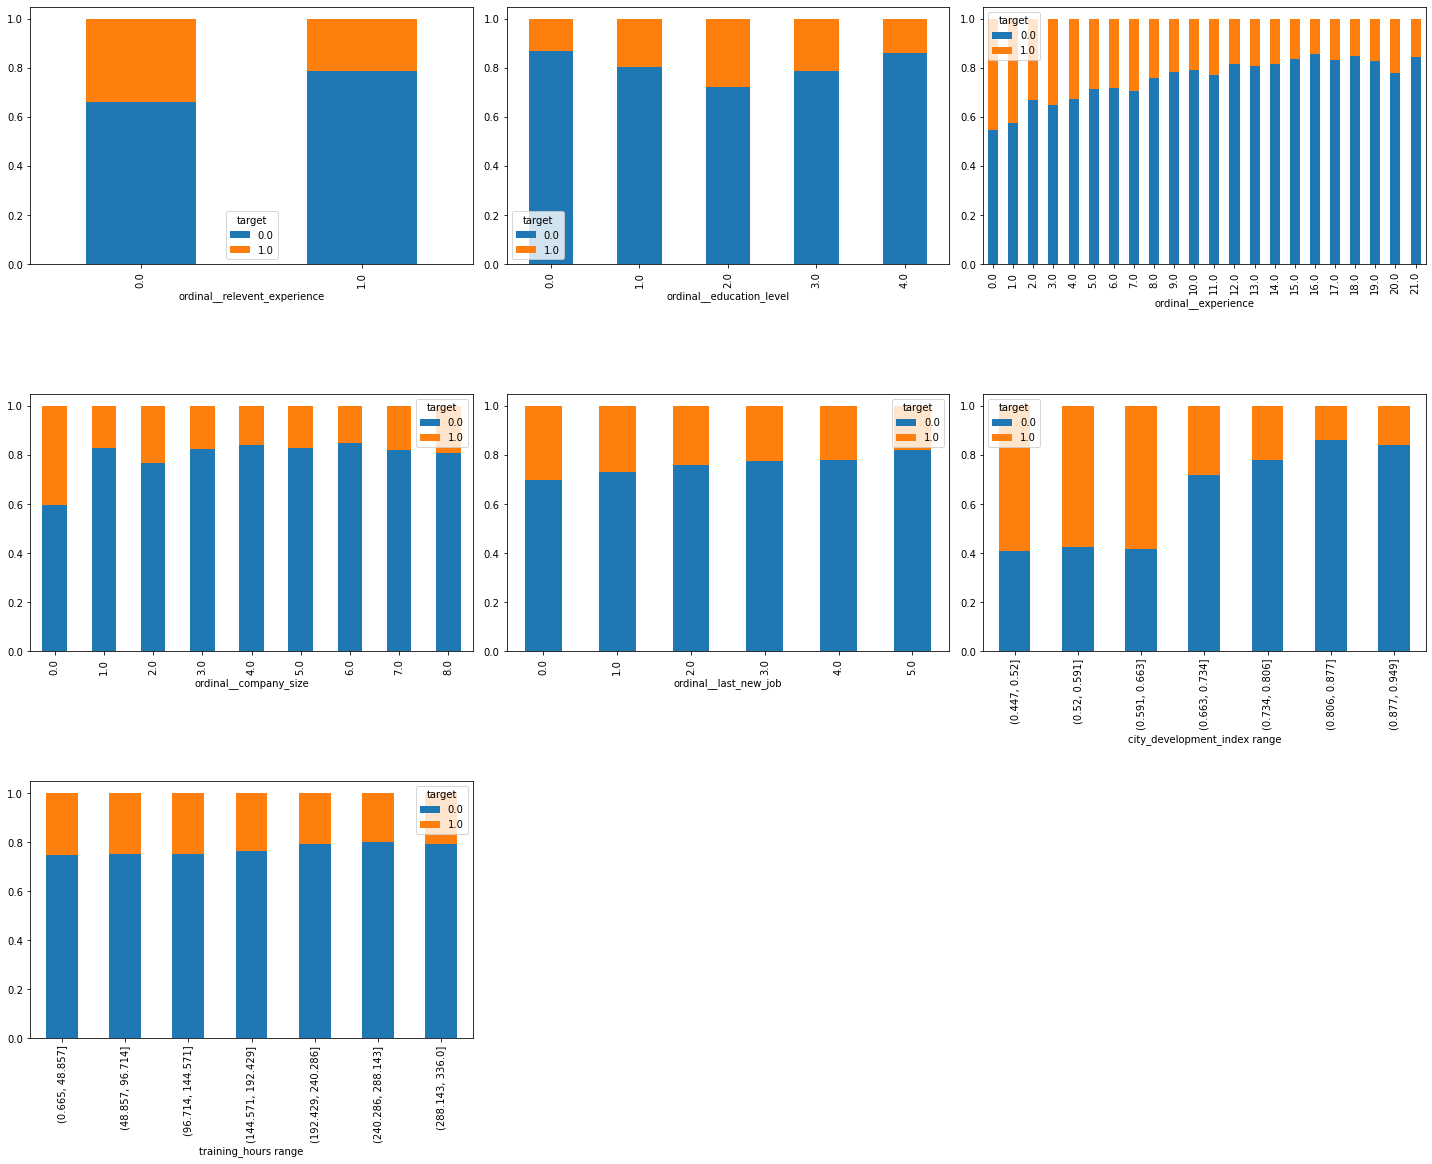

In [32]:
# Proportion of ordinal data
count = 0
fig = plt.figure(figsize=(20,20))

for i in df1.drop(columns='target').columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df1[i],df1['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()


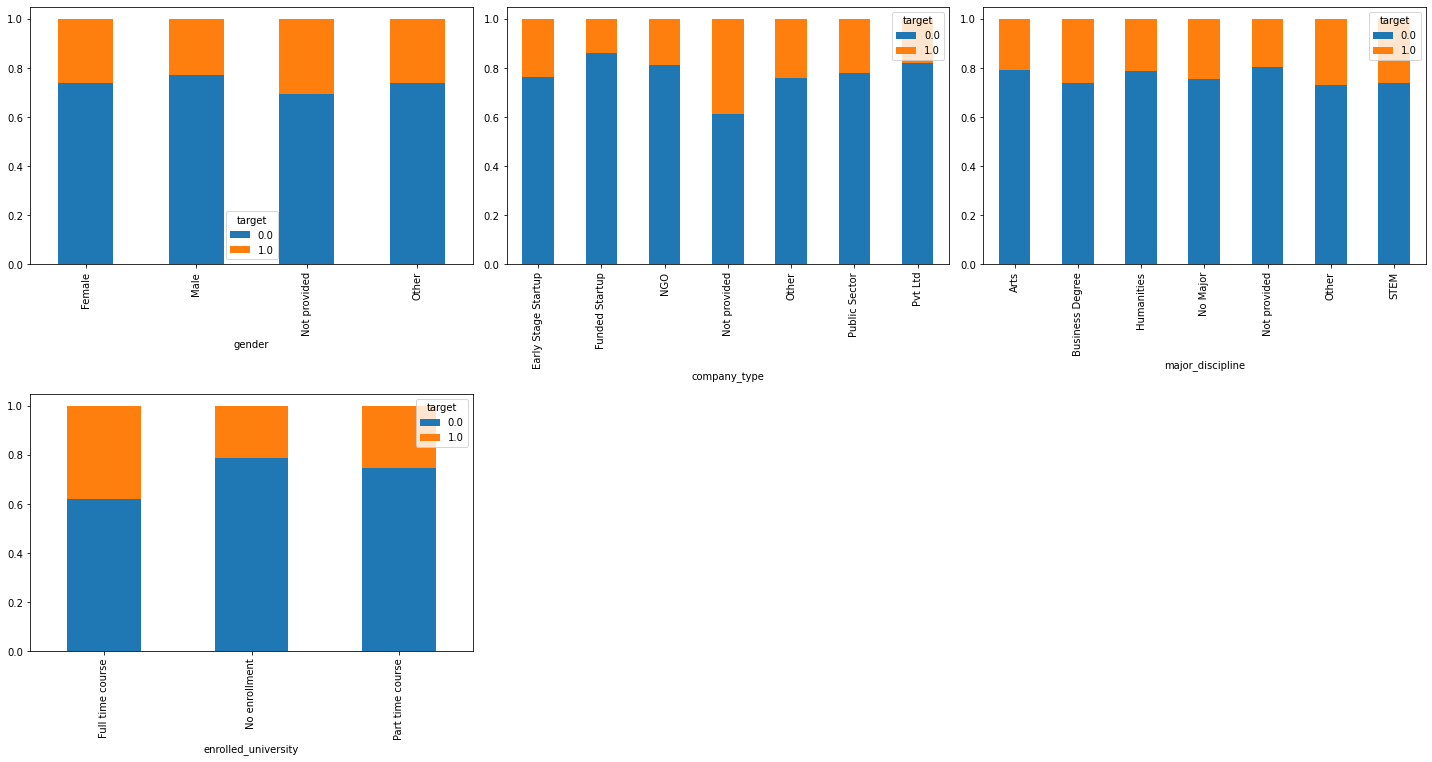

In [33]:
# Proportion of nominal data
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[['gender','company_type','major_discipline','enrolled_university']].columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()


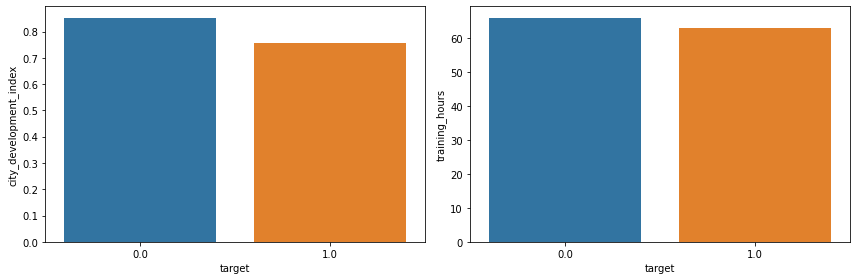

In [34]:
count = 0
fig = plt.figure(figsize=(12,4))

for i in df[['city_development_index','training_hours']].columns:
    count +=1
    ax= plt.subplot(1,2,count)
    sns.barplot(data=df, x='target', y=i, ci=None, estimator=np.mean)
    fig.tight_layout()

# Model Selection

We will try several models:
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest

feature : 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'  
target : 'target'

In [35]:
x = df.drop(columns=['enrollee_id','city','target'])
y = df['target']

## Splitting Data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=.2,random_state=2020)

## Model Benchmarking

In [37]:
# Model variables
logreg = LogisticRegression(max_iter=100, random_state=2020)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, random_state=2020)
rf = RandomForestClassifier(random_state=2020)

In [38]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

### Model Benchmarking: Data train

In [39]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'mean':rata,'sdev':std}).set_index('model').sort_values(by='mean',ascending=False)

mean      sdev
model                                  
Random Forest        0.782692  0.004918
Decision Tree        0.775697  0.006667
Logistic Regression  0.756353  0.009495
KNN                  0.639860  0.007537

In [40]:
models = [logreg,knn,dt,rf]
score = []

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score.append(roc_auc_score(y_test,y_predict_proba))

### Model Benchmarking: Data train

In [41]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
             'roc auc score':score}).set_index('model').sort_values(by='roc auc score',ascending=False)

roc auc score
model                             
Random Forest             0.783209
Decision Tree             0.777336
Logistic Regression       0.749269
KNN                       0.643783

### Performance Comparison: Data train & Data test

In [42]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
              'Data Train Result':rata,
             'Data Test Result':score}).set_index('model').sort_values(by='Data Test Result',ascending=False)

Data Train Result  Data Test Result
model                                                   
Random Forest                 0.782692          0.783209
Decision Tree                 0.775697          0.777336
Logistic Regression           0.756353          0.749269
KNN                           0.639860          0.643783

**Random Forest give best performances based on Data train and Data test**

## Imbalance data handling

In [43]:
cv_score = []

# Resampling methods variable
nearmiss=NearMiss()
smote = SMOTE(random_state=2020)
model= RandomForestClassifier()

for i in [nearmiss,smote]:
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
    ])
    skfold= StratifiedKFold(n_splits=5)
    model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
    cv_score.append(model_cv.mean())

estimator= Pipeline([
        ('preprocess', transformer),
        ('model',RandomForestClassifier(class_weight='balanced'))
    ])
skfold= StratifiedKFold(n_splits=5)
model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
cv_score.append(model_cv.mean())

In [44]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score}).set_index('model').sort_values(by='cv score',ascending=False)

cv score
model                 
Class Weight  0.785695
SMOTE         0.779334
Nearmiss      0.659649

In [45]:
models = [nearmiss, smote]
score = []

for i in models:
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
         ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score.append(roc_auc_score(y_test,y_predict_proba))
    print(i, roc_auc_score(y_test,y_predict_proba))

estimator= Pipeline([
        ('preprocess', transformer),
        ('model',RandomForestClassifier(class_weight='balanced'))
    ])
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_test)
y_predict_proba = estimator.predict_proba(x_test)[:,1]
score.append(roc_auc_score(y_test,y_predict_proba))

NearMiss() 0.6509624081221895
SMOTE(random_state=2020) 0.7771859139192039


In [46]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score,
             'roc auc score':score}).set_index('model').sort_values(by='cv score',ascending=False)

cv score  roc auc score
model                                
Class Weight  0.785695       0.783778
SMOTE         0.779334       0.777186
Nearmiss      0.659649       0.650962

fpr       tpr        th     ratio
99   0.210636  0.692147  0.310000  3.285983
100  0.214807  0.703665  0.300000  3.275799
101  0.215155  0.703665  0.291800  3.270507
102  0.221759  0.715183  0.290000  3.225050
103  0.222106  0.715183  0.287506  3.220003
104  0.232881  0.727749  0.280000  3.124975
105  0.241919  0.730890  0.270000  3.021222
106  0.249218  0.739267  0.260000  2.966348
107  0.249566  0.739267  0.256008  2.962216
108  0.260341  0.748691  0.250000  2.875813

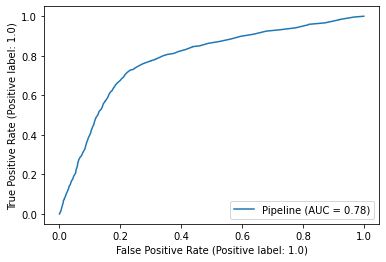

In [73]:
fpr, tpr, threshold=roc_curve(y_test,y_predict_proba)

plot_roc_curve(estimator,x_test,y_test)
roc_auc_score(y_test,y_pred)
df_treshold = pd.DataFrame({
    "fpr":fpr,
    "tpr":tpr,
    "th":threshold
})
df_treshold_filtered = df_treshold[(df_treshold['fpr']>=0.21) & (df_treshold['fpr']<=0.27)]
df_treshold_filtered['ratio'] = df_treshold_filtered['tpr']/df_treshold_filtered['fpr']
df_treshold_filtered.sort_values('ratio',ascending=False)

<AxesSubplot:xlabel='fpr', ylabel='tpr'>

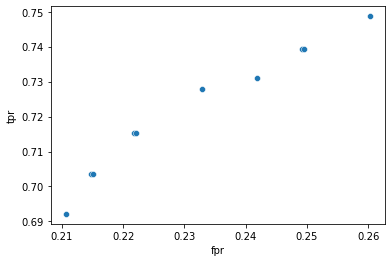

In [74]:
sns.scatterplot(data=df_treshold_filtered, x='fpr', y='tpr')

In [75]:
th1 = df_treshold_filtered.loc[105][2]
th1

0.27

In [76]:
y_pred = np.where(y_predict_proba>th1,1,0)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_predict_proba))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      2877
         1.0       0.51      0.73      0.60       955

    accuracy                           0.76      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.76      0.77      3832

0.783777640685196


# Model Tunning

In [77]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(),
                                    ['gender', 'company_type', 'major_discipline',
                                     'enrolled_university']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'relevent_experience',
                                                             'mapping': {'Has relevent experience': 1,
                                                                         'No relevent experience': 0}},
                                                            {'col': 'education_level',
                                                             'mapping': {'Graduate': 2,
                                                                         'High School': 1,
                                                                         'Masters...
       

In [78]:
hyperparam_space={
    'model__n_estimators':[75],
    'model__max_features':['auto','sqrt','log2'],
    'model__max_depth':[None,2,4],
    'model__min_samples_split':[5,7,9,11],
    'model__min_samples_leaf':[2,3,4,7],
    'model__bootstrap':[True,False],
    'model__class_weight': ['balanced','balanced_subsample'],
    'model__criterion':['gini','entropy']
}

In [79]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc',
    n_jobs=-1
)

In [80]:
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8015667717261357
{'model__bootstrap': True, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 7, 'model__n_estimators': 75}


In [81]:
# Score after tunning
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_predict_proba = best_model.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

0.7963345325901217


After model tunning, test score increase from 0.783 to 0.796

## Feature Selection

In [82]:
x_train_preprocessed = transformer.fit_transform(x_train)
model = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None,
                            max_features= 'sqrt', min_samples_leaf= 7, min_samples_split= 9,
                            n_estimators= 75, class_weight='balanced')
rfe = RFE(model)

rfe.fit(x_train_preprocessed,y_train)
features_select=pd.DataFrame({'select':rfe.support_},index=estimator.named_steps["preprocess"].get_feature_names())
features_select[features_select['select']==True]

select
onehot__x0_Male                 True
onehot__x1_Not provided         True
onehot__x1_Pvt Ltd              True
onehot__x2_Not provided         True
onehot__x2_STEM                 True
onehot__x3_Full time course     True
onehot__x3_No enrollment        True
ordinal__relevent_experience    True
ordinal__education_level        True
ordinal__experience             True
ordinal__company_size           True
ordinal__last_new_job           True
city_development_index          True
training_hours                  True

In [83]:
x_test_preprocessed = transformer.transform(x_test)
x_train_select = pd.DataFrame(rfe.transform(x_train_preprocessed),columns=features_select[features_select['select']==True].index)
x_test_select = pd.DataFrame(rfe.transform(x_test_preprocessed),columns=features_select[features_select['select']==True].index)

model.fit(x_train_select,y_train)
y_predict_proba = model.predict_proba(x_test_select)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

0.799169801294615


Setelah menggunakan RFE, didapat fitur-fitur yang dianggap paling penting. Kemudian dilakukan modeling menggunakan fitur tersebut didapat test score yang naik secara tidak signifikan dari 0.7976 ke 0.7991. Sehingga, diputuskan untuk menggunakan feature selection untuk memudahkan interpretasi data.

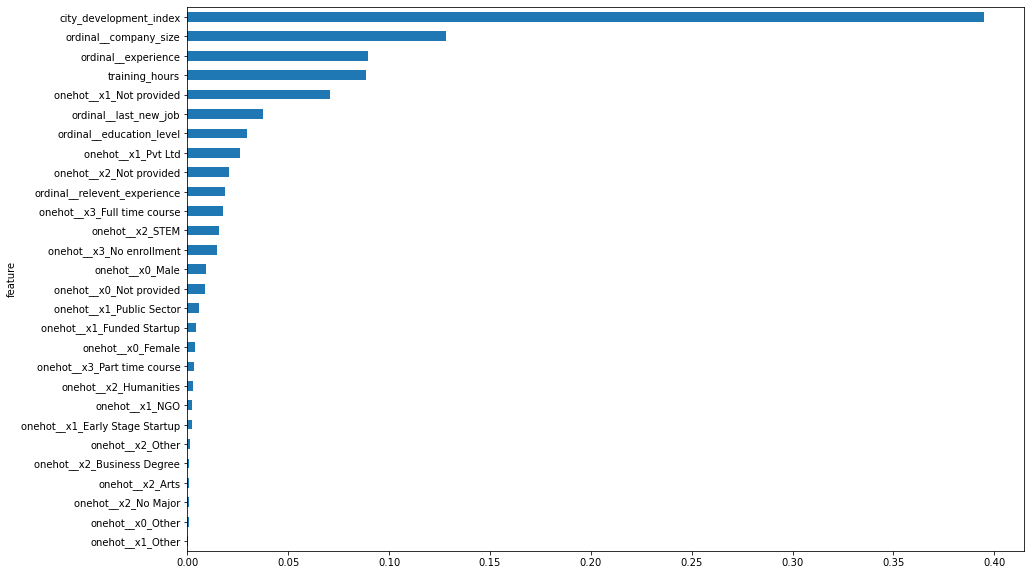

In [84]:
feature_names = estimator.named_steps["preprocess"].get_feature_names()
coefs = best_model.named_steps["model"].feature_importances_
zipped = zip(feature_names, coefs)
df1 = pd.DataFrame(zipped, columns=["feature", "value"])
ax = df1.set_index('feature')['value'].sort_values().plot(kind='barh',figsize=(15,10))

In [85]:
df1.sort_values(by='value',ascending=False).reset_index()

index                         feature     value
0      26          city_development_index  0.395130
1      24           ordinal__company_size  0.128431
2      23             ordinal__experience  0.089591
3      27                  training_hours  0.088344
4       7         onehot__x1_Not provided  0.070556
5      25           ordinal__last_new_job  0.037266
6      22        ordinal__education_level  0.029364
7      10              onehot__x1_Pvt Ltd  0.026346
8      15         onehot__x2_Not provided  0.020648
9      21    ordinal__relevent_experience  0.018916
10     18     onehot__x3_Full time course  0.017569
11     17                 onehot__x2_STEM  0.015523
12     19        onehot__x3_No enrollment  0.014886
13      1                 onehot__x0_Male  0.009475
14      2         onehot__x0_Not provided  0.008635
15      9        onehot__x1_Public Sector  0.005699
16      5       onehot__x1_Funded Startup  0.004248
17      0               onehot__x0_Female  0.003558
18     20     onehot__x3_Part time course  0.003340
19     13           onehot__x2_Humanities  0.002933
20      6                  onehot__x1_NGO  0.002455
21      4  onehot__x1_Early Stage Startup  0.002130
22     16                onehot__x2_Other  0.001147
23     12      onehot__x2_Business Degree  0.001036
24     11                 onehot__x2_Arts  0.000949
25     14             onehot__x2_No Major  0.000676
26      3                onehot__x0_Other  0.000668
27      8                onehot__x1_Other  0.000481

***
x0 : gender (11,13,14,22)  
x1 : company_type (7,9,15,16,18,19,25)  
x2 : major_discipline (10,12,17,20,21,23,24)

